## Importing all the required Libraries

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,AveragePooling2D, BatchNormalization
from tensorflow.keras import datasets


from sklearn.preprocessing import StandardScaler

In [74]:
(X_train,y_train), (X_test,y_test) = datasets.mnist.load_data()

In [75]:
X_train.shape

(60000, 28, 28)

In [76]:
X_train[0]        

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [77]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [102]:
## Defining the CNN architecture

model = Sequential(
    name = 'Baseline_Model',
    layers = [Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape=(28,28,1)),
              AveragePooling2D(pool_size = (2,2)),

              BatchNormalization(),

              Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
              AveragePooling2D(pool_size = (2,2)),

              BatchNormalization(),

              Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape=(28,28,1)),
              AveragePooling2D(pool_size = (2,2)),

              BatchNormalization(),
            

              Flatten(),
              Dense(128, activation = 'relu'),
              Dense(64,activation = 'relu'),
              Dense(10, activation = 'softmax')
              ]
    )

In [103]:
model.summary()

Model: "Baseline_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 average_pooling2d_28 (Avera  (None, 13, 13, 32)       0         
 gePooling2D)                                                    
                                                                 
 batch_normalization_6 (Batc  (None, 13, 13, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_43 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 average_pooling2d_29 (Avera  (None, 5, 5, 64)         0         
 gePooling2D)                                                    
                                                    

In [104]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [105]:
history = model.fit(
    X_train_scaled,
    y_train,
    batch_size = 64,
    epochs= 20,
    #callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience= 5)],
    validation_split = 0.2
)

Epoch 1/20
750/750 [==============================] - 8s 11ms/step - loss: 0.1741 - accuracy: 0.9474 - val_loss: 0.1183 - val_accuracy: 0.9627
Epoch 2/20
750/750 [==============================] - 8s 10ms/step - loss: 0.1064 - accuracy: 0.9696 - val_loss: 0.1355 - val_accuracy: 0.9650
Epoch 3/20
750/750 [==============================] - 8s 10ms/step - loss: 0.1375 - accuracy: 0.9664 - val_loss: 0.2179 - val_accuracy: 0.9520
Epoch 4/20
750/750 [==============================] - 8s 10ms/step - loss: 0.1930 - accuracy: 0.9635 - val_loss: 0.2598 - val_accuracy: 0.9649
Epoch 5/20
750/750 [==============================] - 8s 10ms/step - loss: 0.2888 - accuracy: 0.9660 - val_loss: 0.5463 - val_accuracy: 0.9492
Epoch 6/20
750/750 [==============================] - 8s 10ms/step - loss: 0.3681 - accuracy: 0.9671 - val_loss: 0.5347 - val_accuracy: 0.9610
Epoch 7/20
750/750 [==============================] - 8s 10ms/step - loss: 0.4876 - accuracy: 0.9672 - val_loss: 2.2410 - val_accuracy: 0.9066

In [106]:
history.history

{'loss': [0.17406150698661804,
  0.1064390167593956,
  0.13747663795948029,
  0.1930105984210968,
  0.2887851595878601,
  0.3681271970272064,
  0.48756566643714905,
  0.5846653580665588,
  0.8433473110198975,
  0.8840771913528442,
  1.0065220594406128,
  1.5607733726501465,
  1.489497423171997,
  1.9686172008514404,
  2.448110342025757,
  2.463869333267212,
  3.009810209274292,
  4.819846153259277,
  4.43166971206665,
  5.08071756362915],
 'accuracy': [0.9473958015441895,
  0.9696249961853027,
  0.9663957953453064,
  0.9634999632835388,
  0.965958297252655,
  0.9670833349227905,
  0.9672291278839111,
  0.9682083129882812,
  0.9669166803359985,
  0.9710833430290222,
  0.972041666507721,
  0.969083309173584,
  0.9740416407585144,
  0.9705416560173035,
  0.9701666831970215,
  0.9731458425521851,
  0.9727500081062317,
  0.9661874771118164,
  0.9719374775886536,
  0.9708333015441895],
 'val_loss': [0.11827520281076431,
  0.13547606766223907,
  0.21787884831428528,
  0.25983911752700806,
  0

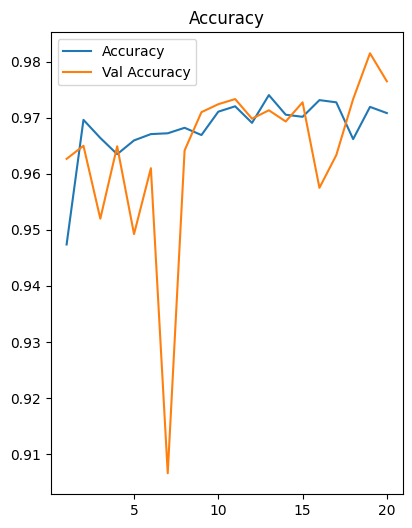

In [111]:
def plot_accuaracy(history = history):

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = np.arange(1,len(val_accuracy) + 1)

    plt.figure(figsize=(10,6))

    plt.subplot(1,2,1)
    plt.title('Accuracy')
    plt.plot(epochs, accuracy, label = 'Accuracy')
    plt.plot(epochs, val_accuracy, label = 'Val Accuracy')
    plt.legend()
    plt.show()
    


plot_accuaracy(history)


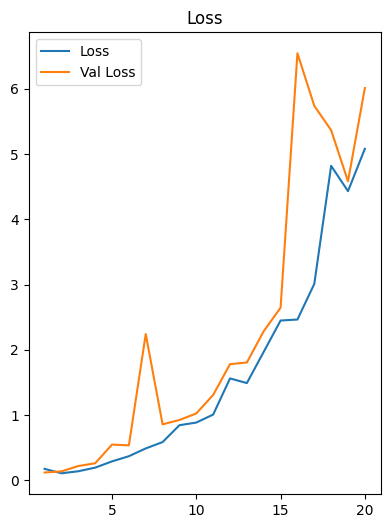

In [113]:
def plot_loss(history = history):

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = np.arange(1,len(val_loss) + 1)

    plt.figure(figsize=(10,6))

    plt.subplot(1,2,1)
    plt.title('Loss')
    plt.plot(epochs, loss, label = 'Loss')
    plt.plot(epochs, val_loss, label = 'Val Loss')
    plt.legend()
    plt.show()
    


plot_loss(history)


### Something is wrong with our approach. The loss keeps increasing over the number of epochs.